<a href="https://colab.research.google.com/github/ChristianTrummer99/fluids-labs/blob/master/Fluids_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np, math as m, matplotlib.pyplot as plt
import plotly.graph_objects as go


In [0]:
nu = 1.004e-6 #m^2/s
g = 9.81

In [0]:
#Table 1

Q = np.array([0.078, 0.143, 0.215, 0.265, 0.291])/1000 #m^3/s
upstr = np.array([495, 575, 693, 820, 879])/1000 #m
dnstr = np.array([461, 455, 488, 520, 518])/1000 #m

d = 13.6/1000 #m
l = 0.912 #m

dif = upstr - dnstr

#velocity
A = m.pi/4*d**2
V = Q/A

#calculate Reynolds number
Re = V*d/nu

#calculate f from losses 
f = dif/4*d/l*2*g/V**2

#Blasius f
Blasius =  0.079*(Re)**(-0.25)

fig = go.Figure(data=[go.Table(header=dict(values=['$Q\\, [m^{3}/s]$', '$upstream \\,[m]$','$downstream \\,[m]$',
                                                   '$difference \\,[m]$','$Velocity\\,[m/s]$','$Re$',
                                                   '$f$','$Blasius\\,f$']),
                               cells=dict(values=[np.around(Q,7),upstr,dnstr,np.around(dif,4),np.around(V,4),
                                                  np.around(Re,1),np.around(f,7),np.around(Blasius, 7)]))])
fig.update_layout(title_text='Table 1')
fig.show()

In [0]:
#Table 2

Q = np.array([0.118, 0.274, 0.312, 0.332, 0.345])/1000 #m^3/s
upstr = np.array([260, 420, 471, 500, 520])/1000 #m
dnstr = np.array([241, 330, 351, 367, 377])/1000 #m

d = 14/1000 #m
l = 0.2 #m
r = 0.036 #epsilon/diameter

dif = upstr - dnstr

#velocity
A = m.pi/4*d**2
V = Q/A

#calculate Reynolds number
Re = V*d/nu

# calculate f from losses
f = dif/4*d/l*2*g/V**2

#use moody diagram
Moodyf = np.array([0.064, 0.063, 0.062, 0.062, 0.062])/4


fig = go.Figure(data=[go.Table(header=dict(values=['$Q\\, [m^{3}/s]$', '$upstream \\,[m]$','$downstream \\,[m]$',
                                                   '$difference \\,[m]$','$Velocity\\,[m/s]$','$Re$',
                                                   '$f$','$Moody\\,f$']),
                               cells=dict(values=[np.around(Q,7),upstr,dnstr,np.around(dif,4),np.around(V,4),
                                                  np.around(Re,1),np.around(f,7),np.around(Moodyf, 7)]))])
fig.update_layout(title_text='Table 2')
fig.show()

In [0]:
#Table 3

Q = np.array([0.089, 0.132, 0.214, 0.293, 0.312])/1000 #m^3/s
upstr = np.array([610, 655, 750, 870, 908])/1000 #m
dnstr = np.array([570, 570, 550, 525, 518])/1000 #m

d = 13.6/1000 #m
l = 0.858 #m, had to change length from 0.92 to 0.858 to achieve a positive 
# loss due to bend geometry

dif = upstr - dnstr

#velocity
A = m.pi/4*d**2
V = Q/A

#calculate Reynolds number
Re = V*d/nu

#Blasius f
Blasius =  0.079*(Re)**(-0.25)

#u^2/2g
u2over2g = V**2/2/g

#straight pipe losses
spl = 4*Blasius*l/d*u2over2g

#headloss due to bend
bl = dif - spl

fig = go.Figure(data=[go.Table(header=dict(values=['$Q\\, [m^{3}/s]$', '$upstream \\,[m]$','$downstream \\,[m]$',
                                                   '$difference \\,[m]$','$Velocity\\,[m/s]$','$Re$',
                                                   '$Blasius\\,f$','$Straight\\,pipe\\,loss\\,[m]$','$u^2/2g\\,[m]$',
                                                   '$Headloss\\,due\\,to\\,bend\\,[m]$']),
                               cells=dict(values=[np.around(Q,7),upstr,dnstr,np.around(dif,4),
                                                  np.around(V,4),np.around(Re,1),np.around(Blasius, 7),np.around(spl,4),
                                                  np.around(u2over2g,4),np.around(bl,7)]))])
fig.update_layout(title_text='Table 3')
fig.show()

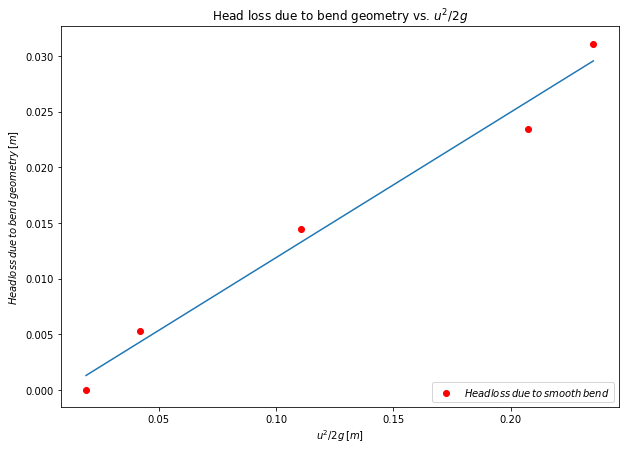



loss factor due to bend geometry kb =  0.13080737799050415


In [0]:
b1, b0 = np.polyfit(u2over2g, bl, 1)
fit = b0 + b1*u2over2g
plt.plot(u2over2g, bl,'ro', label='$Headloss\\,due\\,to\\,smooth\\,bend$')
plt.plot(u2over2g, fit)
plt.xlabel('$u^2/2g\\,[m]$')
plt.ylabel('$Headloss\\,due\\,to\\,bend\\,geometry\\,[m]$')
plt.title('Head loss due to bend geometry vs. $u^2/2g$')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(10,7)
plt.show()

kb = b1
print('\n\nloss factor due to bend geometry kb = ',kb)

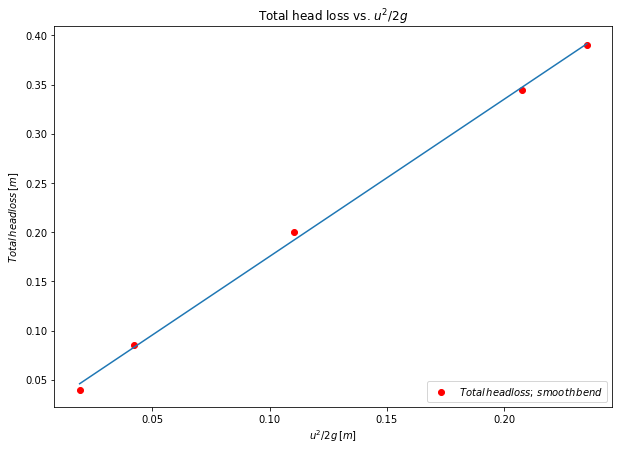



Total loss factor kL =  1.5996614745709516


In [0]:
b1, b0 = np.polyfit(u2over2g, dif, 1)
fit = b0 + b1*u2over2g
plt.plot(u2over2g,dif,'ro', label='$Total\\,headloss;\\,smooth\\,bend$')
plt.plot(u2over2g, fit)
plt.xlabel('$u^2/2g\\,[m]$')
plt.ylabel('$Total\\,headloss\\,[m]$')
plt.title('Total head loss vs. $u^2/2g$')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(10,7)
plt.show()

kl = b1
print('\n\nTotal loss factor kL = ',kl)